In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
df=pd.read_csv('car.csv')


In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Report

In [4]:
print(f"Data has {df.shape[0]} rows and{df.shape[1]} columns")

Data has 301 rows and9 columns


In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.shape

(301, 9)

In [8]:
numCol=[]
catCol=[]

for col in df.columns:
    if df[col].dtype=='O':
        catCol.append(col)
    else:
            numCol.append(col)

In [9]:
print("List of categorical columns:",catCol)
print("List of numerical columns:",numCol)

List of categorical columns: ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']
List of numerical columns: ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']


# Missing Value Analysis of Dataset


In [10]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
df[df.isna().sum(axis=1)>1]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


# Check Duplicate,Repeated and Unknown values

In [12]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [13]:
for i in catCol:
    print(i,"---%Null", (df[i].shape[0]-df[i].notnull().sum()) / df[i].shape[0]*100)
    print(df[i].value_counts())
    print("\n")

Car_Name ---%Null 0.0
city             26
corolla altis    16
verna            14
fortuner         11
brio             10
                 ..
corolla           1
Hero Glamour      1
etios gd          1
Activa 4g         1
Bajaj  ct 100     1
Name: Car_Name, Length: 98, dtype: int64


Fuel_Type ---%Null 0.0
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


Seller_Type ---%Null 0.0
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


Transmission ---%Null 0.0
Manual       261
Automatic     40
Name: Transmission, dtype: int64




In [14]:
for i in numCol:
    print(i,"---%Null", (df[i].shape[0]-df[i].notnull().sum()) / df[i].shape[0]*100)
    print(df[i].value_counts())
    print("\n")

Year ---%Null 0.0
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2005     4
2006     4
2003     2
2007     2
2004     1
2018     1
Name: Year, dtype: int64


Selling_Price ---%Null 0.0
0.60     8
0.45     8
4.50     7
5.25     7
4.75     6
        ..
0.51     1
3.15     1
11.45    1
6.85     1
20.75    1
Name: Selling_Price, Length: 156, dtype: int64


Present_Price ---%Null 0.0
9.40     15
13.60    13
5.70      8
4.43      7
1.47      7
         ..
5.35      1
12.04     1
8.93      1
7.87      1
9.54      1
Name: Present_Price, Length: 147, dtype: int64


Kms_Driven ---%Null 0.0
45000    9
15000    9
35000    5
25000    5
50000    5
        ..
56001    1
21700    1
13000    1
4300     1
44542    1
Name: Kms_Driven, Length: 206, dtype: int64


Owner ---%Null 0.0
0    290
1     10
3      1
Name: Owner, dtype: int64




# Descriptive Statistics

In [15]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [16]:
df[numCol].describe

<bound method NDFrame.describe of      Year  Selling_Price  Present_Price  Kms_Driven  Owner
0    2014           3.35           5.59       27000      0
1    2013           4.75           9.54       43000      0
2    2017           7.25           9.85        6900      0
3    2011           2.85           4.15        5200      0
4    2014           4.60           6.87       42450      0
..    ...            ...            ...         ...    ...
296  2016           9.50          11.60       33988      0
297  2015           4.00           5.90       60000      0
298  2009           3.35          11.00       87934      0
299  2017          11.50          12.50        9000      0
300  2016           5.30           5.90        5464      0

[301 rows x 5 columns]>

In [17]:
df[catCol].describe

<bound method NDFrame.describe of     Car_Name Fuel_Type Seller_Type Transmission
0       ritz    Petrol      Dealer       Manual
1        sx4    Diesel      Dealer       Manual
2       ciaz    Petrol      Dealer       Manual
3    wagon r    Petrol      Dealer       Manual
4      swift    Diesel      Dealer       Manual
..       ...       ...         ...          ...
296     city    Diesel      Dealer       Manual
297     brio    Petrol      Dealer       Manual
298     city    Petrol      Dealer       Manual
299     city    Diesel      Dealer       Manual
300     brio    Petrol      Dealer       Manual

[301 rows x 4 columns]>

In [18]:
df[catCol].describe().T

,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Seller_Type,301,2,Dealer,195
Transmission,301,2,Manual,261


# Univariate Analysis

In [19]:
for i in catCol:
    print(i)
    print(df[i].nunique())
    print(df[i].value_counts())
    print("\n")

Car_Name
98
city             26
corolla altis    16
verna            14
fortuner         11
brio             10
                 ..
corolla           1
Hero Glamour      1
etios gd          1
Activa 4g         1
Bajaj  ct 100     1
Name: Car_Name, Length: 98, dtype: int64


Fuel_Type
3
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


Seller_Type
2
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


Transmission
2
Manual       261
Automatic     40
Name: Transmission, dtype: int64




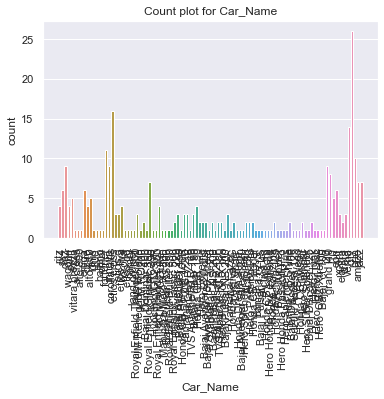

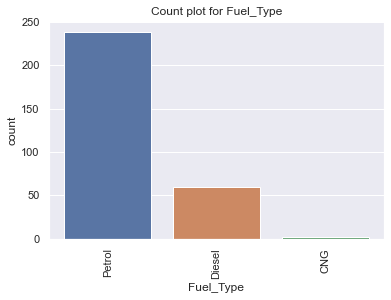

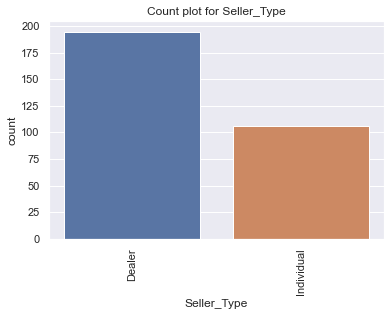

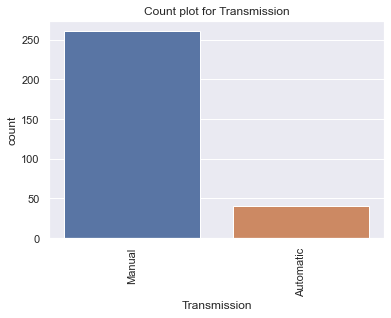

In [20]:
for i in catCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.title(f"Count plot for {i}")
    plt.plot()
    plt.show()

<Figure size 432x288 with 0 Axes>

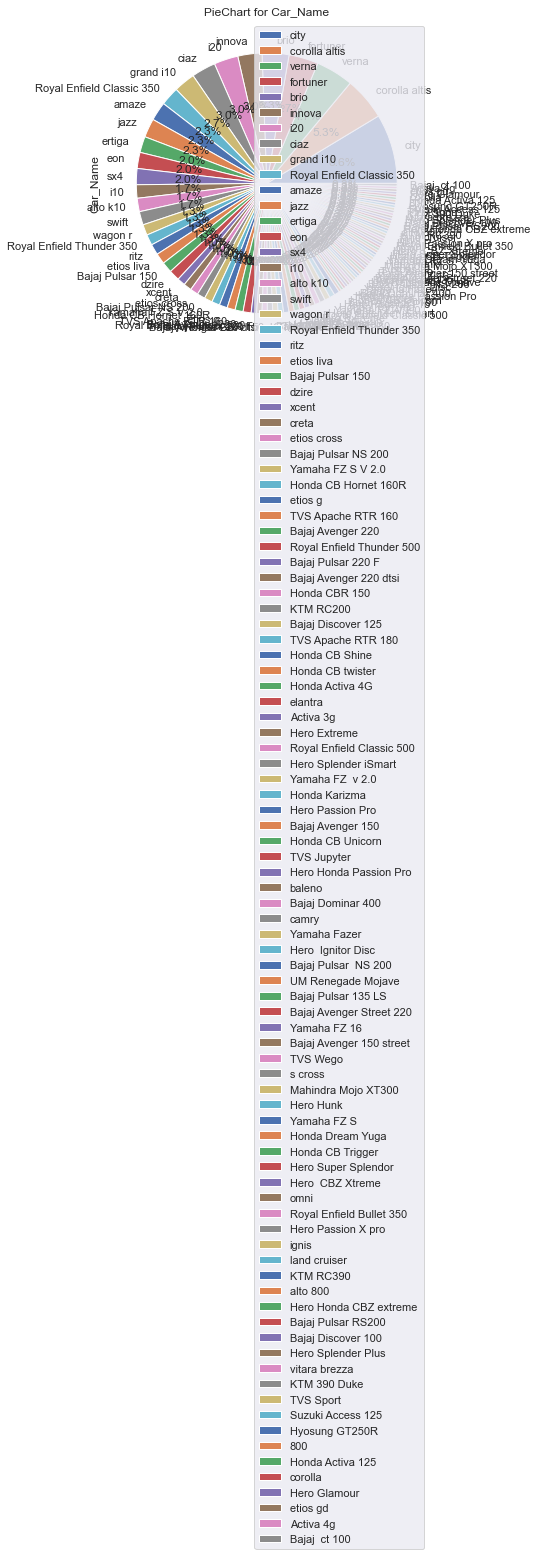

<Figure size 432x288 with 0 Axes>

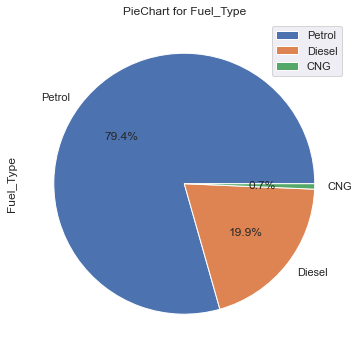

<Figure size 432x288 with 0 Axes>

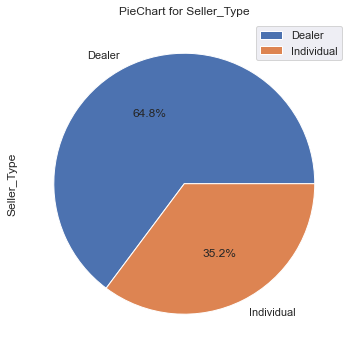

<Figure size 432x288 with 0 Axes>

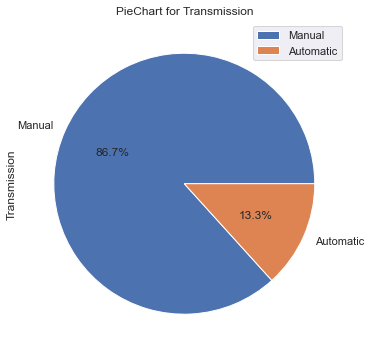

In [21]:
for i in catCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    countsDF= pd.DataFrame(df[i].value_counts())
    plot= countsDF.plot.pie(subplots=True,autopct="%.1f%%",figsize=(11,6))
    plt.title(f"PieChart for {i}")
    plt.plot()
    plt.show()

In [22]:
for i in numCol:
    print(i)
    print(df[i].nunique())
    print(df[i].value_counts())
    print("\n")

Year
16
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2005     4
2006     4
2003     2
2007     2
2004     1
2018     1
Name: Year, dtype: int64


Selling_Price
156
0.60     8
0.45     8
4.50     7
5.25     7
4.75     6
        ..
0.51     1
3.15     1
11.45    1
6.85     1
20.75    1
Name: Selling_Price, Length: 156, dtype: int64


Present_Price
147
9.40     15
13.60    13
5.70      8
4.43      7
1.47      7
         ..
5.35      1
12.04     1
8.93      1
7.87      1
9.54      1
Name: Present_Price, Length: 147, dtype: int64


Kms_Driven
206
45000    9
15000    9
35000    5
25000    5
50000    5
        ..
56001    1
21700    1
13000    1
4300     1
44542    1
Name: Kms_Driven, Length: 206, dtype: int64


Owner
3
0    290
1     10
3      1
Name: Owner, dtype: int64




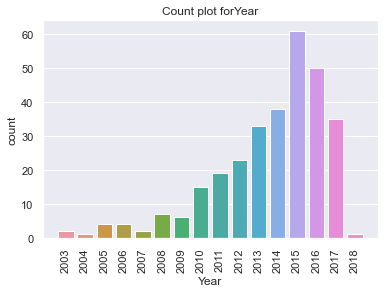

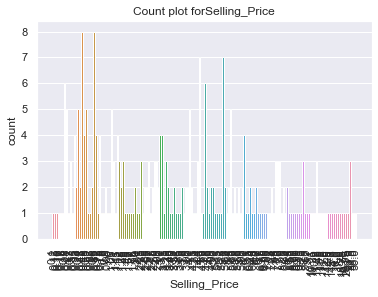

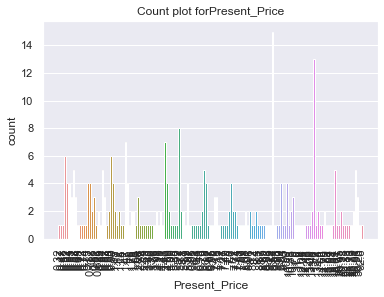

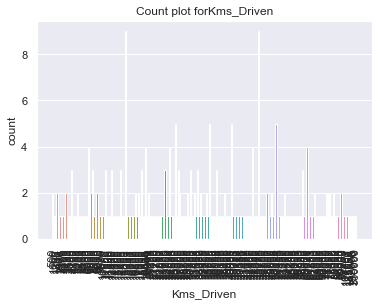

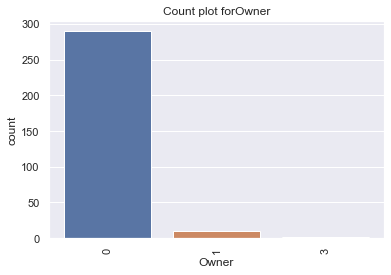

In [23]:
for i in numCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.title(f"Count plot for{i}")
    plt.plot()
    plt.show()

Year


<Figure size 432x288 with 0 Axes>

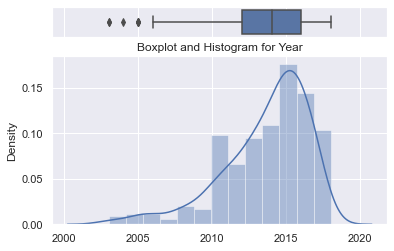

Selling_Price


<Figure size 432x288 with 0 Axes>

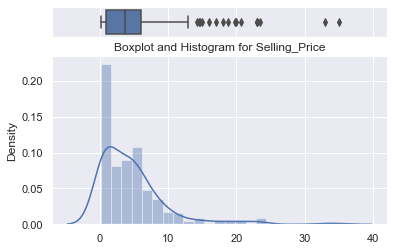

Present_Price


<Figure size 432x288 with 0 Axes>

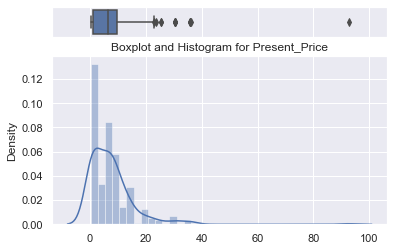

Kms_Driven


<Figure size 432x288 with 0 Axes>

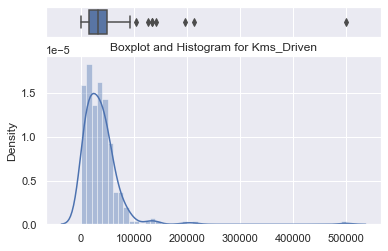

Owner


<Figure size 432x288 with 0 Axes>

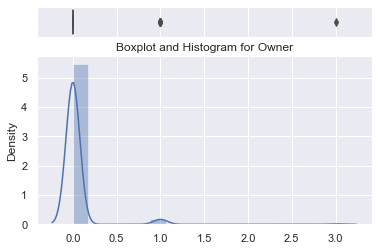

In [24]:
for i in numCol:
    print(i)
    plt.figure()
    sns.set_theme(style="darkgrid")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
    sns.boxplot(x = df[i],ax=ax_box)
    #sns.histplot (data=df, x=i, ax=ax_hist)
    sns.distplot(x= df[i],ax=ax_hist)
    ax_box.set(xlabel='')
    plt.plot()
    plt.title(f"Boxplot and Histogram for {i}")
    plt.show()

In [25]:
pd.DataFrame(df.skew(axis=0,skipna=True))

,0
Year,-1.246189
Selling_Price,2.493422
Present_Price,4.083150
Kms_Driven,6.436013
Owner,7.616850


# Multivariate Analysis

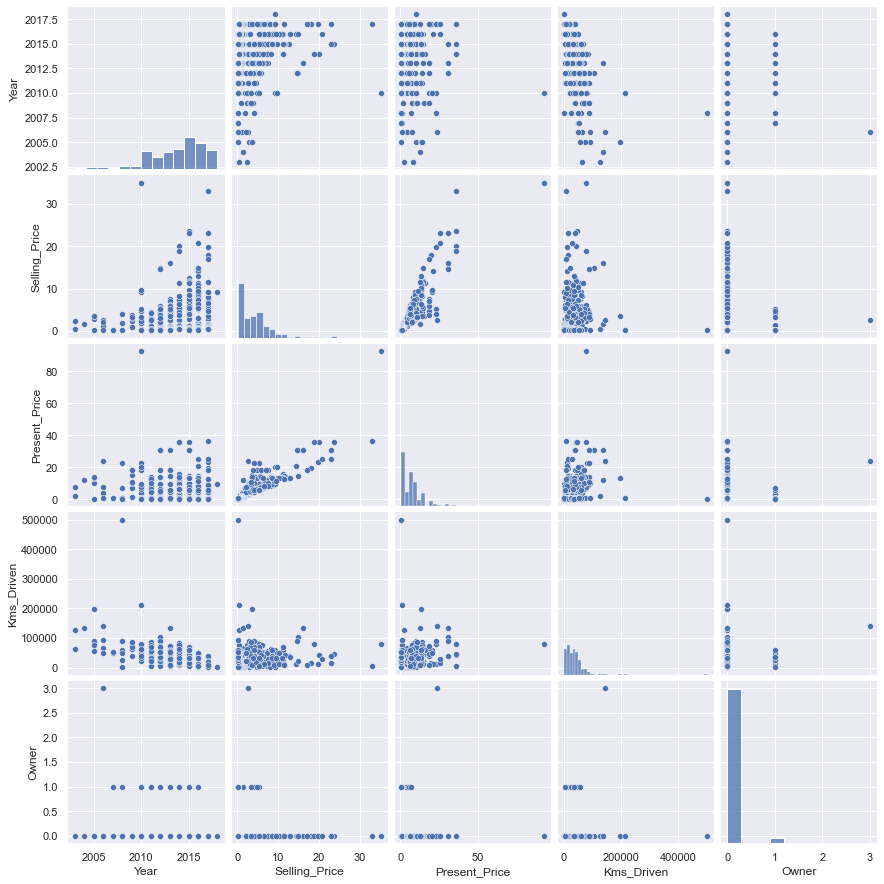

In [26]:
sns.pairplot(df)
plt.plot()
plt.show()

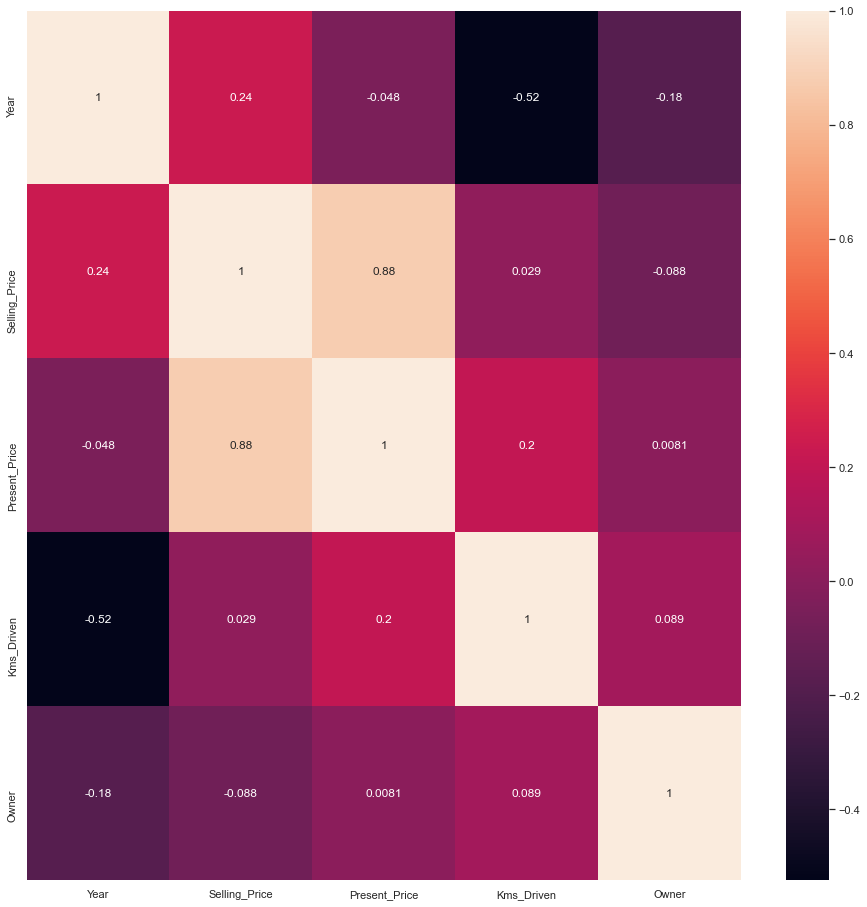

In [27]:
plt.figure(figsize= (16,16))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Data Scaling

In [28]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [29]:
df_num=pd.DataFrame(imp_median.fit_transform(df[numCol]), columns=numCol)
df_cat=pd.DataFrame(imp_mode.fit_transform(df[catCol]),columns=catCol)

In [30]:
df=pd.concat([df_num,df_cat],axis=1)

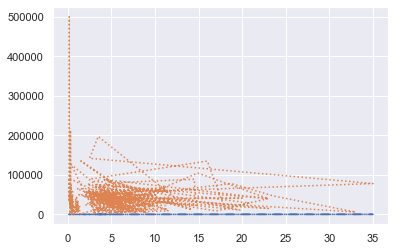

In [31]:
plt.plot(df["Selling_Price"],df["Present_Price"],label="Line1",linestyle="-.")
plt.plot(df["Selling_Price"],df["Kms_Driven"],label="Line2",linestyle=":")
plt.plot();

# Matplotlib-Pandas

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df=pd.read_csv("car.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


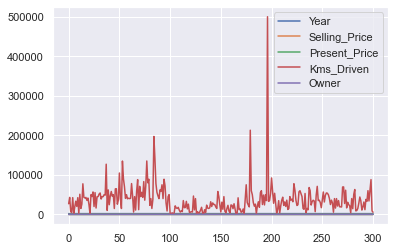

In [34]:
df = pd.read_csv('car.csv')

df.plot()

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


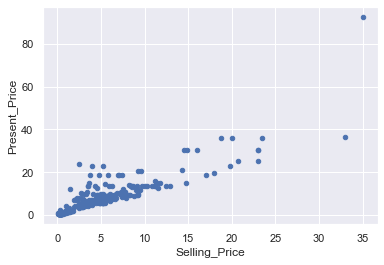

In [35]:
df = pd.read_csv('car.csv')

df.plot(kind = 'scatter', x = 'Selling_Price', y = 'Present_Price')

plt.show()

<AxesSubplot:ylabel='Frequency'>

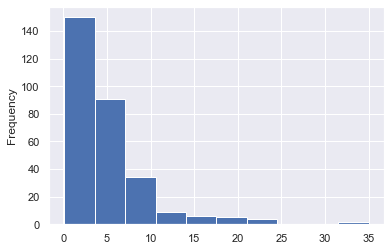

In [36]:
df["Selling_Price"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

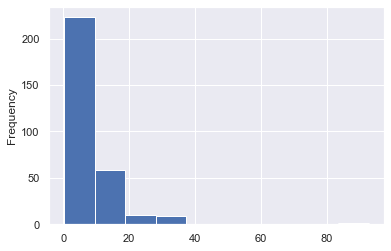

In [37]:
df["Present_Price"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

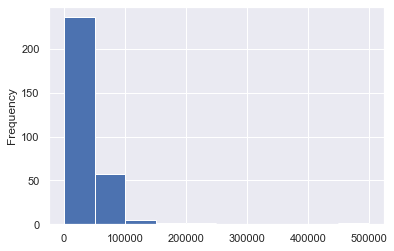

In [38]:
df["Kms_Driven"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

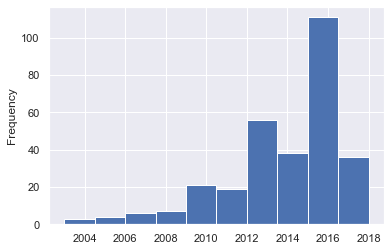

In [39]:
df["Year"].plot(kind = 'hist')

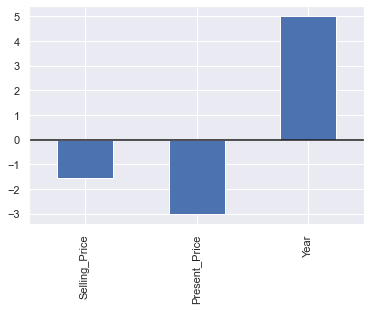

In [40]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range(
                                '1/1/2000', periods = 1000))
 
df = pd.DataFrame(np.random.randn(1000, 4), index = ts.index,
                                      columns = list('Year'))
 
df3 = pd.DataFrame(np.random.randn(1000, 2),
               columns =['Selling_Price', 'Present_Price']).cumsum()
 
df3['Year'] = pd.Series(list(range(len(df))))
df3.iloc[5].plot.bar()
plt.axhline(0, color ='k')
 
plt.show()

<Figure size 432x288 with 0 Axes>

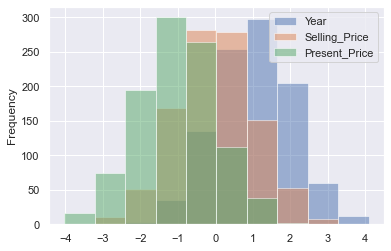

In [41]:
df4 = pd.DataFrame({'Year': np.random.randn(1000) + 1,
                    'Selling_Price': np.random.randn(1000),
                    'Present_Price': np.random.randn(1000) - 1},
                           columns =['Year', 'Selling_Price', 'Present_Price'])
plt.figure()
 
df4.plot.hist(alpha = 0.5)
plt.show()

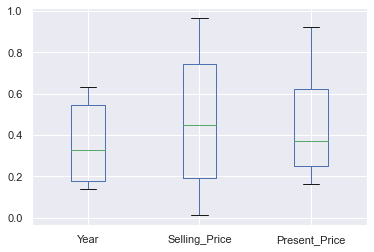

In [42]:
df = pd.DataFrame(np.random.rand(10, 3),
      columns =['Year', 'Selling_Price', 'Present_Price'])
 
df.plot.box()
plt.show()

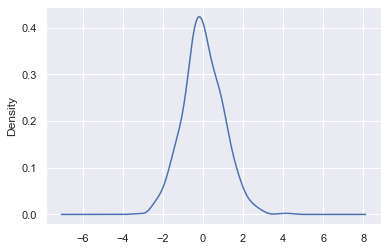

In [43]:
#Density Plot
df = pd.DataFrame(np.random.rand(10, 3),
      columns =['Year', 'Selling_Price', 'Present_Price'])
 
ser = pd.Series(np.random.randn(1000))
ser.plot.kde()
 
plt.show()

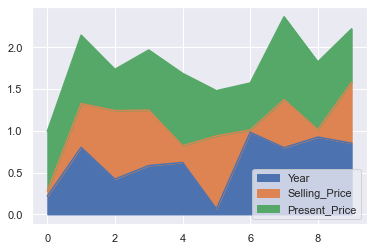

In [44]:
#Area plot using matplotlib
df = pd.DataFrame(np.random.rand(10, 3),
       columns =['Year', 'Selling_Price', 'Present_Price'])
 
df.plot.area()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


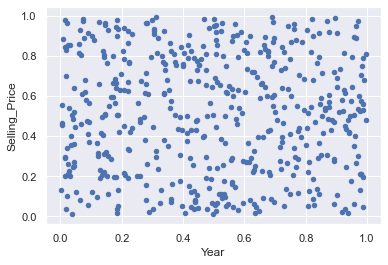

In [45]:
#Scatter plot
df = pd.DataFrame(np.random.rand(500, 3),
           columns =['Year', 'Selling_Price', 'Present_Price'])
 
df.plot.scatter(x ='Year', y ='Selling_Price')
plt.show()

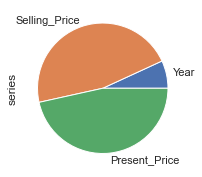

In [46]:
series = pd.Series(3 * np.random.rand(3),
  index =['Year', 'Selling_Price', 'Present_Price'], name ='series')
 
series.plot.pie(figsize =(3, 3))
plt.show()

# Heatmap of Dataset

<AxesSubplot:>

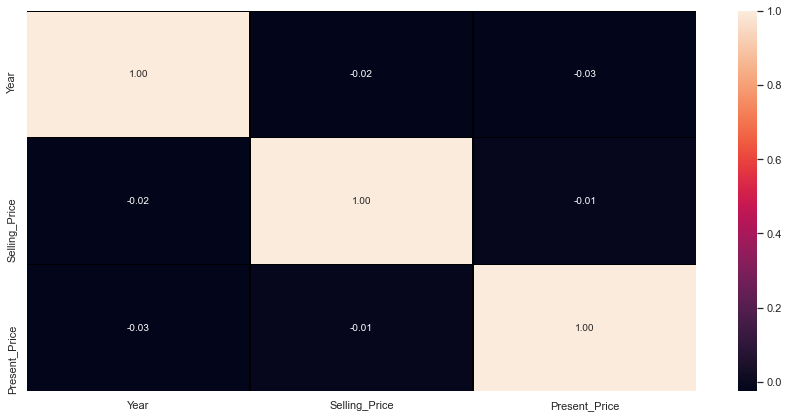

In [47]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

In [48]:
df.describe()

,Year,Selling_Price,Present_Price
count,500.000000,500.000000,500.000000
mean,0.493134,0.507398,0.506370
std,0.293595,0.289302,0.287900
min,0.002671,0.009534,0.005082
25%,0.221771,0.256732,0.249623
50%,0.500065,0.506657,0.517014
75%,0.735918,0.766788,0.754516
max,0.995625,0.994221,0.998149


In [49]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of          Year  Selling_Price  Present_Price
0    0.801572       0.355500       0.084185
1    0.059439       0.815492       0.483307
2    0.696910       0.889189       0.168622
3    0.173073       0.193441       0.988216
4    0.015686       0.844348       0.290838
..        ...            ...            ...
495  0.520343       0.653125       0.857987
496  0.511905       0.067929       0.426467
497  0.718135       0.730788       0.124081
498  0.330750       0.799325       0.703841
499  0.336379       0.382288       0.310000

[500 rows x 3 columns]>

# Dropping Columns

In [50]:
df=pd.read_csv('car.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [51]:
df.shape

(301, 9)

In [52]:
df=df.drop('Fuel_Type',axis=1)
df=df.drop('Car_Name',axis=1)
df=df.drop('Year',axis=1)
df=df.drop('Seller_Type',axis=1)
df=df.drop('Transmission',axis=1)
df=df.drop('Owner',axis=1)
df

,Selling_Price,Present_Price,Kms_Driven
0,3.35,5.59,27000
1,4.75,9.54,43000
2,7.25,9.85,6900
3,2.85,4.15,5200
4,4.60,6.87,42450
...,...,...,...
296,9.50,11.60,33988
297,4.00,5.90,60000
298,3.35,11.00,87934
299,11.50,12.50,9000


# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [53]:
X=df.drop('Selling_Price',axis=1)
Y=df['Selling_Price']

In [54]:
Y.value_counts()

0.60     8
0.45     8
4.50     7
5.25     7
4.75     6
        ..
0.51     1
3.15     1
11.45    1
6.85     1
20.75    1
Name: Selling_Price, Length: 156, dtype: int64

In [55]:
X

,Present_Price,Kms_Driven
0,5.59,27000
1,9.54,43000
2,9.85,6900
3,4.15,5200
4,6.87,42450
...,...,...
296,11.60,33988
297,5.90,60000
298,11.00,87934
299,12.50,9000


In [56]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# Label Binarization

In [57]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0)

In [58]:
Y

0      0
1      0
2      1
3      0
4      0
      ..
296    1
297    0
298    0
299    1
300    0
Name: Selling_Price, Length: 301, dtype: int64

In [59]:
X

,Present_Price,Kms_Driven
0,5.59,27000
1,9.54,43000
2,9.85,6900
3,4.15,5200
4,6.87,42450
...,...,...
296,11.60,33988
297,5.90,60000
298,11.00,87934
299,12.50,9000


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Present_Price,Kms_Driven
0,-0.236215,-0.256224
1,0.221505,0.155911
2,0.257427,-0.773969
3,-0.403079,-0.817758
4,-0.087890,0.141743
...,...,...
296,0.460214,-0.076225
297,-0.200292,0.593804
298,0.390687,1.313340
299,0.564504,-0.719876


# Create Train & Test for DataSet

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

# Machine Learning Model

In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [63]:
#Classification of model function
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=21)
#Training the model
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    acc_score=(accuracy_score(Y_test,pred))*100
    print("Accuracy Score:",acc_score)
    class_report=classification_report(Y_test,pred)
    print("\nClassification Report:\n",class_report)
    cv_score=(cross_val_score(model,X,Y,cv=5).mean())*100
    print("Cross Validation Score:",cv_score)
    result=acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is",result)

In [64]:
#Logistic Regression Model
model=LogisticRegression()
classify(model,X,Y)

Accuracy Score: 86.88524590163934

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        49
           1       0.75      0.50      0.60        12

    accuracy                           0.87        61
   macro avg       0.82      0.73      0.76        61
weighted avg       0.86      0.87      0.86        61

Cross Validation Score: 88.05464480874316

Accuracy Score - Cross Validation Score is -1.169398907103826


In [65]:
#Support Vector Classifier
model=SVC(C=1.0,kernel='rbf',gamma='auto',random_state=42)
classify(model,X,Y)

Accuracy Score: 86.88524590163934

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        49
           1       0.75      0.50      0.60        12

    accuracy                           0.87        61
   macro avg       0.82      0.73      0.76        61
weighted avg       0.86      0.87      0.86        61

Cross Validation Score: 88.72131147540983

Accuracy Score - Cross Validation Score is -1.8360655737704974


In [66]:
#KNeighbors Classifier
model=KNeighborsClassifier(n_neighbors=15)
classify(model,X,Y)

Accuracy Score: 88.52459016393442

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        49
           1       0.78      0.58      0.67        12

    accuracy                           0.89        61
   macro avg       0.84      0.77      0.80        61
weighted avg       0.88      0.89      0.88        61

Cross Validation Score: 88.39890710382514

Accuracy Score - Cross Validation Score is 0.12568306010928154


# AUC ROC Curve

In [67]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 88.52459016393442


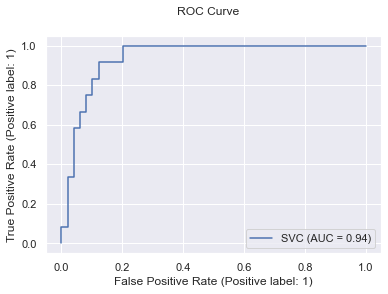

In [68]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

In [70]:
#reading the dataset
data=pd.read_csv('car.csv')
print(data.shape)
data.head()

(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [71]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [72]:
print('Unique elements in Seller_Type are',data['Seller_Type'].unique())
print('Unique elements in Fuel_Type are',data['Fuel_Type'].unique())
print('Unique elements in Transmission are',data['Transmission'].unique())
print('Unique elements in Owner are',data['Owner'].unique())
print('Unique elements in Year are',data['Year'].unique())

Unique elements in Seller_Type are ['Dealer' 'Individual']
Unique elements in Fuel_Type are ['Petrol' 'Diesel' 'CNG']
Unique elements in Transmission are ['Manual' 'Automatic']
Unique elements in Owner are [0 1 3]
Unique elements in Year are [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


In [73]:
print('Unique elements in Car_Name are',data['Car_Name'].nunique())

Unique elements in Car_Name are 98


In [74]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Feature Engineering

In [75]:
dataset=data[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [76]:
dataset['Present_Year']=2020
dataset['Number_of_Years_Old']=dataset['Present_Year']- dataset['Year']
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Year,Number_of_Years_Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [77]:
dataset.drop(labels=['Year', 'Present_Year'],axis=1,inplace=True)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_Years_Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


# Encoding the Categorical Variables

In [78]:
#select categorical variables from then dataset, and then implement categorical encoding for nominal variables
Fuel_Type=dataset[['Fuel_Type']]
Fuel_Type=pd.get_dummies(Fuel_Type, drop_first=True)

Seller_Type=dataset[['Seller_Type']]
Seller_Type=pd.get_dummies(Seller_Type, drop_first=True)

Transmission=dataset[['Transmission']]
Transmission=pd.get_dummies(Transmission, drop_first=True)

dataset=pd.concat([dataset,Fuel_Type, Seller_Type, Transmission], axis=1)

dataset.drop(labels=['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1, inplace=True)

dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [79]:
dataset.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Number_of_Years_Old', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [80]:
# Dataset Correlation
dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Number_of_Years_Old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


# Data Visualization and Correlation

<AxesSubplot:>

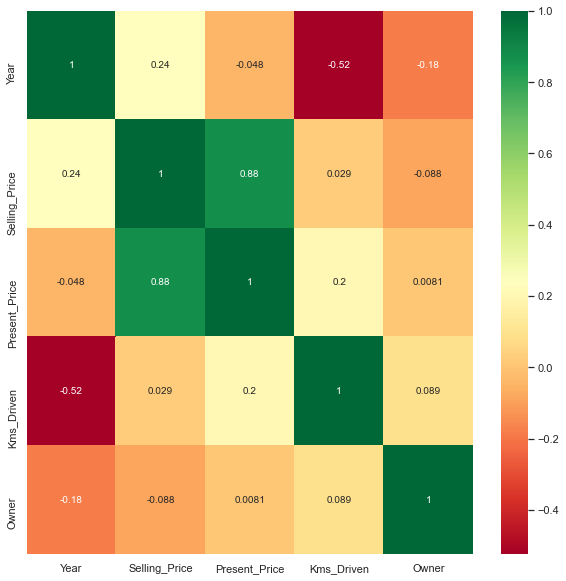

In [81]:
#Correlations of features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#Plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [82]:
sell=dataset['Selling_Price']
dataset.drop(['Selling_Price'], axis=1, inplace=True)
dataset=dataset.join(sell)
dataset.head()

,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
0,5.59,27000,0,6,0,1,0,1,3.35
1,9.54,43000,0,7,1,0,0,1,4.75
2,9.85,6900,0,3,0,1,0,1,7.25
3,4.15,5200,0,9,0,1,0,1,2.85
4,6.87,42450,0,6,1,0,0,1,4.60


In [83]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

[0.38913032 0.04358997 0.00085346 0.07716225 0.21793921 0.01200964
 0.13003855 0.12927661]


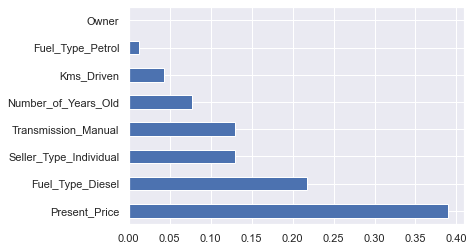

In [84]:
### To determine important features, make use of ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Model Building and Training

In [85]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import StratifiedKFold
#kfold = StratifiedKFold(n_splits=3)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Decision Tree Score on Training set is 1.0
Decision Tree Score on Test Set is 0.9202815383374512
[0.9542394  0.84409548 0.69916028 0.924205   0.92156403]
Accuracy: 86.87 %
Standard Deviation: 9.22 %
Mean Absolute Error: 0.8102197802197801
Mean Squared Error: 2.3840648351648355
RMSE: 1.5440417206684653
The r2_score is 0.9202815383374512


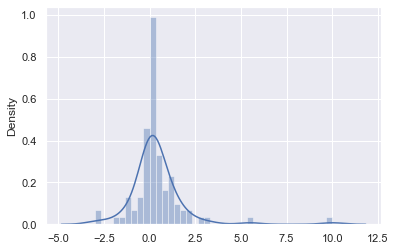

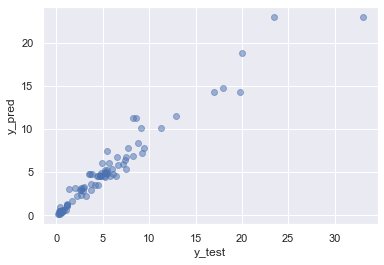

In [88]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)

print("Decision Tree Score on Training set is",dt_reg.score(X_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(dt_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Random Forest Regressor

Random Forest Score on Training set is 0.9098643369513644
Random Forest Score on Test Set is 0.8691871361112977
[0.95343199 0.8175433  0.62817528 0.82701288 0.9282102 ]
Accuracy: 83.09 %
Standard Deviation: 11.47 %
Mean Absolute Error: 0.8849059677437242
Mean Squared Error: 3.912096925608035
RMSE: 1.9779021526880534
The r2_score is 0.8691871361112977


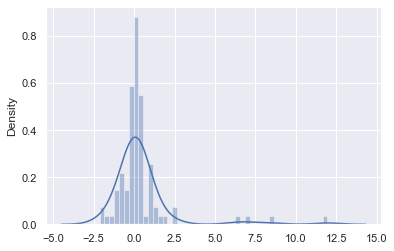

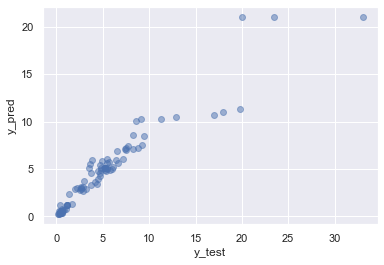

In [89]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=2,
max_features='auto', max_depth=30)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)

print("Random Forest Score on Training set is",rf_reg.score(X_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",rf_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(rf_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Voting Regressor
Voting Regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset to average the individual predictions to form a final prediction.

Voting Regresssor Score on Training set is 0.9774770627437626
Voting Regresssor Score on Test Set is 0.9011856812089695
[0.96999326 0.84164499 0.69207495 0.89624323 0.94134878]
Accuracy: 86.83 %
Standard Deviation: 9.82 %
Mean Absolute Error: 0.8212686079381828
Mean Squared Error: 2.955146621339502
RMSE: 1.7190539902340187
The r2_score is 0.9011856812089695


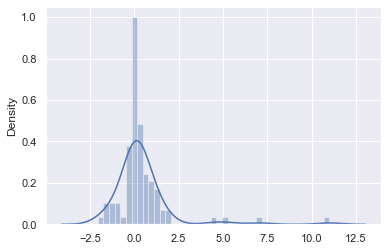

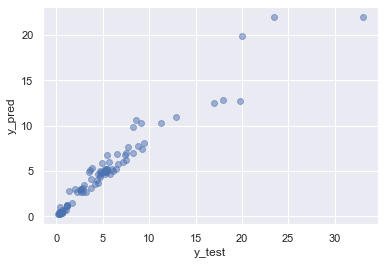

In [90]:
from sklearn.ensemble import VotingRegressor
vot_reg = VotingRegressor([('DecisionTree', dt_reg), ('RandomForestRegressor', rf_reg)])
vot_reg.fit(X_train, y_train)
y_pred=vot_reg.predict(X_test)

print("Voting Regresssor Score on Training set is",vot_reg.score(X_train, y_train))#Training Accuracy
print("Voting Regresssor Score on Test Set is",vot_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(vot_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()